In [71]:
import json
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
from score import compute_score, compute_score_from_weighted_incident_rate
from bokeh.plotting import figure, output_file, show
from bokeh.resources import INLINE
import bokeh.io
# bokeh.io.output_notebook(INLINE)
from bokeh.io import output_file, show
# from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.layouts import row
import seaborn as sns; sns.set()

In [72]:
mylist = []
for line in open('drivers-194.json'):
    mylist.append(json.loads(line.rstrip()))

# [json.loads(line.rstrip() for line in open('filename')] this is equivalent to the code above-written as a comprehension
#pandas.read_json

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst = df_sorted
# print(df_sorted.info())
# print(df_sorted.head())
# print(df_sorted['id'])

#Need to put code here to select just one month of data at a time

data_cst = data_cst.groupby(data_cst['id'], axis=0).sum()
data_cst = data_cst.reset_index()
# print(data_cst.head())
# print(data_cst.info())

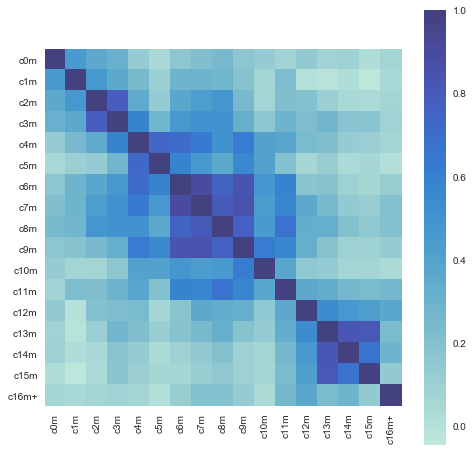

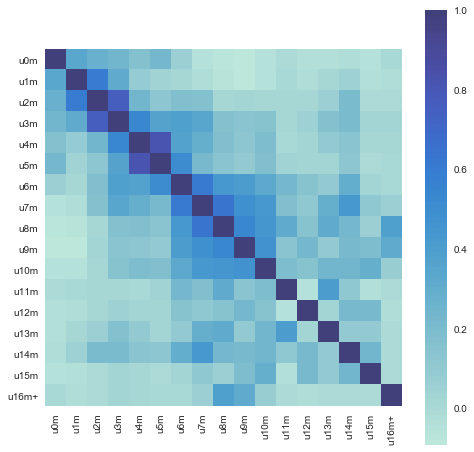

       id   cobs    c0m   c1m   c2m   c3m   c4m  c5m  c6m   c7m   c8m  c9m  \
0  379195    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0   
1  385033  613.0  601.0   5.0   4.0   1.0   2.0  0.0  0.0   0.0   0.0  0.0   
2  395259  806.0  582.0  48.0  95.0  25.0  10.0  6.0  4.0  11.0  15.0  7.0   
3  401135  923.0  815.0  52.0  34.0  12.0   6.0  1.0  0.0   1.0   1.0  1.0   
4  401237    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0   

   c10m  c11m  c12m  c13m  c14m  c15m  c16m+  
0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0    0.0  
2   3.0   0.0   0.0   0.0   0.0   0.0    0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0    0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0    0.0  
       id   uobs    u0m   u1m   u2m   u3m   u4m  u5m  u6m  u7m  u8m  u9m  \
0  379195  110.0  109.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  1.0   
1  385033  761.0  692.0  24.0  17.0  23.0   3.0  2.0  0.0  0.0  0.0  0.0   
2  395259  336.0  279

In [57]:
data_c_m = data_cst[['c0m', 'c1m', 'c2m', 'c3m', 'c4m', 'c5m', 'c6m', 'c7m', 'c8m', 'c9m', 'c10m', 'c11m', 'c12m', 'c13m', 'c14m', 'c15m', 'c16m+']]
# print(data_c_m.head())

cm = data_c_m.corr()
plt.figure(figsize = (8,8))
sns.heatmap(cm, square=True, center=1.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig('data_c_m_heatmap.pdf')
plt.show()

data_u_m = data_cst[['u0m', 'u1m', 'u2m', 'u3m', 'u4m', 'u5m', 'u6m', 'u7m', 'u8m', 'u9m', 'u10m', 'u11m', 'u12m', 'u13m', 'u14m', 'u15m', 'u16m+']]
# print(data_u_m.head())

cm = data_u_m.corr()
plt.figure(figsize = (8,8))
sns.heatmap(cm, square=True, center=1.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig('data_u_m_heatmap.pdf')
plt.show()

data_c_m = data_cst[['id', 'cobs', 'c0m', 'c1m', 'c2m', 'c3m', 'c4m', 'c5m', 'c6m', 'c7m', 'c8m', 'c9m', 'c10m', 'c11m', 'c12m', 'c13m', 'c14m', 'c15m', 'c16m+']]
print(data_c_m.head())

data_u_m = data_cst[['id', 'uobs', 'u0m', 'u1m', 'u2m', 'u3m', 'u4m', 'u5m', 'u6m', 'u7m', 'u8m', 'u9m', 'u10m', 'u11m', 'u12m', 'u13m', 'u14m', 'u15m', 'u16m+']]
print(data_u_m.head())

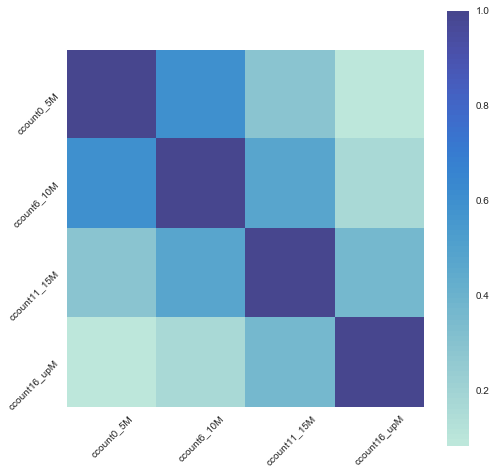

In [58]:
def get_total_c_counts(item):
    ccount0_5m = (item['c1m'] + item['c2m'] + item['c3m'] + item['c4m'] + item['c5m'])

    ccount6_10m = (item['c6m'] + item['c7m'] + item['c8m'] + item['c9m'] + item['c10m'])

    ccount11_15m = (item['c11m'] + item['c12m'] + item['c13m'] + item['c14m'] + item['c15m'])

    ccount16_upm = item['c16m+']
    return ccount0_5m, ccount6_10m, ccount11_15m, ccount16_upm

cct_observations = data_cst['cobs']
data_cst['count_total_c_observations'] = cct_observations
(data_cst['ccount0_5M'],
data_cst['ccount6_10M'],
data_cst['ccount11_15M'],
data_cst['ccount16_upM']) = get_total_c_counts(data_cst)

data_c_m_buckets = data_cst[['ccount0_5M', 'ccount6_10M', 'ccount11_15M', 'ccount16_upM']]
# print(data_c_m.head())

cm = data_c_m_buckets.corr()
plt.figure(figsize = (8,8))
sns.heatmap(cm, square=True, center=1.5)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
# plt.margins(1.0)
plt.savefig('data_c_m_bucket_heatmap.pdf')
plt.show()

In [59]:
# plt.show()

def compute_weighted_values(item):

	item['cobs'] = item['cobs'].astype(int)
	item['ccount0_5M'] = item['ccount0_5M'].astype(int)
	item['ccount6_10M'] = item['ccount6_10M'].astype(int)
	item['ccount11_15M'] = item['ccount11_15M'].astype(int)
	item['ccount16_upM'] = item['ccount16_upM'].astype(int)

	ci = item['ccount0_5M'] + item['ccount6_10M'] + item['ccount11_15M'] + item['ccount16_upM']
	weighted_ci = (item['ccount0_5M'] + (item['ccount6_10M'] * 4) + (item['ccount11_15M'] * 7) + (item['ccount16_upM']*10))

	weighted_cobs = (item['cobs'] - ci + weighted_ci)
	weighted_ci_rate= round(weighted_ci.astype(float) / weighted_cobs.astype(float) * 100.0, 2)
	return ci, weighted_ci, weighted_cobs, weighted_ci_rate

(data_cst['ci'],
data_cst['weighted_ci'],
data_cst['weighted_cobs'],
data_cst['weighted_ci_rate']) = compute_weighted_values(data_cst)

In [60]:
SCALE_MIN = 350
SCALE_MAX = 850

scale_range = SCALE_MAX - SCALE_MIN
data_cst['cscore'] = round((100 - data_cst['weighted_ci_rate']) * scale_range / 100.0 + SCALE_MIN, 2)

# print(data_cst.info())
# print(data_cst.head())

In [61]:
data_cst['id'] = data_cst['id'].astype(str)

score_csorted = data_cst.sort_values('cscore')
score_csorted = score_csorted.set_index('id')
score_csorted = score_csorted.reset_index()
# print(score_csorted.info())
# print(score_sorted.head())

drivers_cscores = score_csorted[['id', 'cscore', 'count_total_c_observations', 'ccount0_5M', 'ccount6_10M', 'ccount11_15M', 'ccount16_upM']]
drivers_cscores['total_cincidents'] = (drivers_cscores['ccount0_5M'] + drivers_cscores['ccount6_10M'] + drivers_cscores['ccount11_15M'] + drivers_cscores['ccount16_upM'])
drivers_cscores['pct_cincidents'] = (drivers_cscores['total_cincidents'] / drivers_cscores['count_total_c_observations']) * 100
drivers_cscores['cpct0_5M'] = (drivers_cscores['ccount0_5M'] / drivers_cscores['count_total_c_observations']) * 100
drivers_cscores['cpct6_10M'] = (drivers_cscores['ccount6_10M'] / drivers_cscores['count_total_c_observations']) * 100
drivers_cscores['cpct11_15M'] = (drivers_cscores['ccount11_15M'] / drivers_cscores['count_total_c_observations']) * 100
drivers_cscores['cpct16_upM'] = (drivers_cscores['ccount16_upM'] / drivers_cscores['count_total_c_observations']) * 100


drivers_cscores =  drivers_cscores.fillna(0)

print(drivers_cscores.head())
print(drivers_cscores.tail())
print(drivers_cscores.info())


          id  cscore  count_total_c_observations  ccount0_5M  ccount6_10M  \
0     434257  437.75                       233.0         186            4   
1    1236207  443.80                      1158.0         544          243   
2  175439715  448.85                       600.0         396           44   
3   15275658  467.15                       249.0         161           16   
4    1375175  505.30                      1159.0         632           85   

   ccount11_15M  ccount16_upM  total_cincidents  pct_cincidents   cpct0_5M  \
0             0             0               190       81.545064  79.828326   
1             8             0               795       68.652850  46.977547   
2             7             0               447       74.500000  66.000000   
3             1             0               178       71.485944  64.658635   
4             1             0               718       61.949957  54.529767   

   cpct6_10M  cpct11_15M  cpct16_upM  
0   1.716738    0.000000     

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [62]:
output_file("pct_C_incidents.html")
source= ColumnDataSource(drivers_cscores)
# hover = HoverTool(tooltips=[('id', '@id')])
hover = HoverTool(tooltips=[('id', '@id'), ('cscore', '@cscore'),('cpct0_5M', '@cpct0_5M'), ('cpct6_10M', '@cpct6_10M'), ('cpct11_15M', '@cpct11_15M'), ('cpct16_upM', '@cpct16_upM')])
p1 = figure(title="Total C Observations vs. % C Incidents", title_location="above", y_range=(-5, 80), plot_width=600, plot_height=400, tools=[hover, 'pan'])
p1.xaxis[0].axis_label = 'Total C Observations'
p1.yaxis[0].axis_label = '% C Incidents'
p1.circle(x = 'count_total_c_observations', y= 'pct_cincidents', color='orange', size=7, source=source)
# show(p1)
p2 = figure(title="c Score vs. % C Incidents", title_location="above", y_range = p1.y_range, plot_width=600, plot_height=400, tools=[hover, 'pan'])
p2.xaxis[0].axis_label = ' C Score'
p2.yaxis[0].axis_label = '% C Incidents'
p2.circle(x = 'cscore', y= 'pct_cincidents', size=7, color='orange', source=source)
p2.add_tools(hover)
show(row(p1, p2))

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct0_5M, cscore [renderer: GlyphRenderer(id='64657614-286a-4117-bf33-316c9cf1b38e', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct11_15M, cscore [renderer: GlyphRenderer(id='45552566-dbe0-4a66-a3d9-ebc4ff816dc1', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct16_upM, cscore [renderer: GlyphRenderer(id='ffe143b8-5a4d-4734-9594-b62e235a15da', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct6_10M, cscore [renderer: GlyphRenderer(id='3d961f26-223f-4780-ad5e-8fc781bff2ae', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct0_5M, cscore [renderer: GlyphRenderer(id='de69a64c-64a5-4820-8aef-6afc97996099', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct11_15M, cscore [renderer: GlyphRenderer(id='83134e26-7b33-48ef-abaa-f4293e49aeb0', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to non

In [63]:
output_file("pct_ranges_Cscore.html")
source= ColumnDataSource(drivers_scores)
hover = HoverTool(tooltips=[('id', '@id')])
p = figure(title="C Score vs. % C Incidents", title_location="above", y_range = (-5, 60), plot_width=600, plot_height=400, tools=[hover, 'pan'])
p.xaxis[0].axis_label = 'C Score'
p.yaxis[0].axis_label = '% C Incidents'
p.circle(x = 'cscore', y= 'cpct0_5M', size=7, source=source, legend='% 0-5M')
p.circle(x = 'cscore', y = 'cpct6_10M', size=7, color='red', source=source, legend='% 5-10M')
p.circle(x = 'cscore', y = 'cpct11_15M', size=7, color='orange', source=source, legend='% 11-15M')
p.circle(x = 'cscore', y = 'cpct16_upM', size=7, color='green', source=source, legend='% 16+M')
p.add_tools(hover)
show(p)

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct0_5M, cscore [renderer: GlyphRenderer(id='64657614-286a-4117-bf33-316c9cf1b38e', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct11_15M, cscore [renderer: GlyphRenderer(id='45552566-dbe0-4a66-a3d9-ebc4ff816dc1', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct16_upM, cscore [renderer: GlyphRenderer(id='ffe143b8-5a4d-4734-9594-b62e235a15da', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct6_10M, cscore [renderer: GlyphRenderer(id='3d961f26-223f-4780-ad5e-8fc781bff2ae', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct0_5M, cscore [renderer: GlyphRenderer(id='de69a64c-64a5-4820-8aef-6afc97996099', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct11_15M, cscore [renderer: GlyphRenderer(id='83134e26-7b33-48ef-abaa-f4293e49aeb0', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to non

In [64]:
def get_total_u_counts(item):
    ucount0_5m = (item['u1m'] + item['u2m'] + item['u3m'] + item['u4m'] + item['u5m'])

    ucount6_10m = (item['u6m'] + item['u7m'] + item['u8m'] + item['u9m'] +  item['u10m'])

    ucount11_15m = (item['u11m'] + item['u12m'] + item['u13m'] + item['u14m'] + item['u15m'])

    ucount16_upm = item['u16m+']
    return ucount0_5m, ucount6_10m, ucount11_15m, ucount16_upm

uct_observations = data_cst['uobs']
data_cst['count_total_u_observations'] = uct_observations
(data_cst['ucount0_5M'],
data_cst['ucount6_10M'],
data_cst['ucount11_15M'],
data_cst['ucount16_upM']) = get_total_u_counts(data_cst)

# print(data_cst.head())

       id   cobs    c0m   c1m   c2m   c3m   c4m  c5m  c6m   c7m   c8m  c9m  \
0  379195    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0   
1  385033  613.0  601.0   5.0   4.0   1.0   2.0  0.0  0.0   0.0   0.0  0.0   
2  395259  806.0  582.0  48.0  95.0  25.0  10.0  6.0  4.0  11.0  15.0  7.0   
3  401135  923.0  815.0  52.0  34.0  12.0   6.0  1.0  0.0   1.0   1.0  1.0   
4  401237    0.0    0.0   0.0   0.0   0.0   0.0  0.0  0.0   0.0   0.0  0.0   

   c10m  c11m  c12m  c13m  c14m  c15m  c16m+  
0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0    0.0  
2   3.0   0.0   0.0   0.0   0.0   0.0    0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0    0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0    0.0  


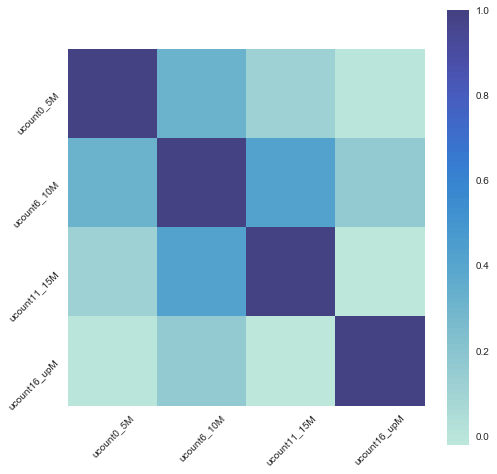

In [65]:
data_u_m_buckets = data_cst[['ucount0_5M', 'ucount6_10M', 'ucount11_15M', 'ucount16_upM']]
print(data_c_m.head())

cm = data_u_m_buckets.corr()
plt.figure(figsize = (8,8))
sns.heatmap(cm, square=True, center=1.5)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
# plt.margins(1.0)
plt.savefig('data_u_m__bucket_heatmap.pdf')
plt.show()

In [66]:
def compute_weighted_uvalues(item):

	item['uobs'] = item['uobs'].astype(int)
	item['cuount0_5M'] = item['ucount0_5M'].astype(int)
	item['ucount6_10M'] = item['ucount6_10M'].astype(int)
	item['ucount11_15M'] = item['ucount11_15M'].astype(int)
	item['ucount16_upM'] = item['ucount16_upM'].astype(int)

	ui = item['ucount0_5M'] + item['ucount6_10M'] + item['ucount11_15M'] + item['ucount16_upM']
	weighted_ui = (item['ucount0_5M'] + (item['ucount6_10M'] * 4) + (item['ucount11_15M'] * 7) + (item['ucount16_upM']*10))

	weighted_uobs = (item['uobs'] - ui + weighted_ui)
	weighted_ui_rate= round(weighted_ui.astype(float) / weighted_uobs.astype(float) * 100.0, 2)
	return ui, weighted_ui, weighted_uobs, weighted_ui_rate

(data_cst['ui'],
data_cst['weighted_ui'],
data_cst['weighted_uobs'],
data_cst['weighted_ui_rate']) = compute_weighted_uvalues(data_cst)

In [67]:
SCALE_MIN = 350
SCALE_MAX = 850

scale_range = SCALE_MAX - SCALE_MIN
data_cst['uscore'] = round((100 - data_cst['weighted_ui_rate']) * scale_range / 100.0 + SCALE_MIN, 2)

# print(data_cst.info())
# print(data_cst.head())

In [68]:
data_cst['id'] = data_cst['id'].astype(str)

score_sorted = data_cst.sort_values('uscore')
score_sorted = score_sorted.set_index('id')
score_sorted = score_sorted.reset_index()
print(score_sorted.info())
print(score_sorted.head())

drivers_scores = score_sorted[['id', 'uscore', 'count_total_u_observations', 'ucount0_5M', 'ucount6_10M', 'ucount11_15M', 'ucount16_upM']]
drivers_scores['total_uincidents'] = (drivers_scores['ucount0_5M'] + drivers_scores['ucount6_10M'] + drivers_scores['ucount11_15M'] + drivers_scores['ucount16_upM'])
drivers_scores['pct_uincidents'] = (drivers_scores['total_uincidents'] / drivers_scores['count_total_u_observations']) * 100							
drivers_scores['upct0_5M'] = (drivers_scores['ucount0_5M'] / drivers_scores['count_total_u_observations']) * 100
drivers_scores['upct6_10M'] = (drivers_scores['ucount6_10M'] / drivers_scores['count_total_u_observations']) * 100
drivers_scores['upct11_15M'] = (drivers_scores['ucount11_15M'] / drivers_scores['count_total_u_observations']) * 100
drivers_scores['upct16_upM'] = (drivers_scores['ucount16_upM'] / drivers_scores['count_total_u_observations']) * 100

print(drivers_scores.head())
print(drivers_scores.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 97 columns):
id                            206 non-null object
c0k                           206 non-null float64
c0m                           206 non-null float64
c10k                          206 non-null float64
c10m                          206 non-null float64
c11k                          206 non-null float64
c11m                          206 non-null float64
c12m                          206 non-null float64
c13k                          206 non-null float64
c13m                          206 non-null float64
c14k                          206 non-null float64
c14m                          206 non-null float64
c15k                          206 non-null float64
c15m                          206 non-null float64
c16k                          206 non-null float64
c16m+                         206 non-null float64
c18k                          206 non-null float64
c19k                         

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

          id  uscore  count_total_u_observations  ucount0_5M  ucount6_10M  \
0  175439715  583.60                       425.0       154.0           27   
1   15275658  603.70                       216.0        62.0           16   
2     776863  603.70                       703.0       197.0           56   
3  289652430  618.70                       267.0        54.0           25   
4     988831  628.25                        91.0        19.0            8   

   ucount11_15M  ucount16_upM  total_uincidents  pct_uincidents   upct0_5M  \
0             2             0             183.0       43.058824  36.235294   
1             1             0              79.0       36.574074  28.703704   
2             2             0             255.0       36.273115  28.022760   
3             1             0              80.0       29.962547  20.224719   
4             0             0              27.0       29.670330  20.879121   

   upct6_10M  upct11_15M  upct16_upM  
0   6.352941    0.470588     

In [69]:
output_file("pct_uincidents.html")
source= ColumnDataSource(drivers_scores)
# hover = HoverTool(tooltips=[('id', '@id')])
hover = HoverTool(tooltips=[('id', '@id'), ('upct0_5M', '@upct0_5M'), ('upct6_10M', '@upct6_10M'), ('upct11_15M', '@upct11_15M'), ('upct16_upM', '@upct16_upM')])
p1 = figure(title="Total U Observations vs. % U Incidents", title_location="above", y_range=(-5, 80), plot_width=600, plot_height=400, tools=[hover, 'pan'])
p1.xaxis[0].axis_label = 'Total U Observations'
p1.yaxis[0].axis_label = '% U Incidents'
p1.circle(x = 'count_total_u_observations', y= 'pct_uincidents', size=7, source=source)
p2 = figure(title="U Score vs. % U Incidents", title_location="above", y_range = p1.y_range, plot_width=600, plot_height=400, tools=[hover, 'pan'])
p2.xaxis[0].axis_label = 'U Score'
p2.yaxis[0].axis_label = '% U Incidents'
p2.circle(x = 'uscore', y= 'pct_uincidents', size=7, source=source)
p2.add_tools(hover)
show(row(p1, p2))

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct0_5M, cscore [renderer: GlyphRenderer(id='64657614-286a-4117-bf33-316c9cf1b38e', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct11_15M, cscore [renderer: GlyphRenderer(id='45552566-dbe0-4a66-a3d9-ebc4ff816dc1', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct16_upM, cscore [renderer: GlyphRenderer(id='ffe143b8-5a4d-4734-9594-b62e235a15da', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct6_10M, cscore [renderer: GlyphRenderer(id='3d961f26-223f-4780-ad5e-8fc781bff2ae', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct0_5M, cscore [renderer: GlyphRenderer(id='de69a64c-64a5-4820-8aef-6afc97996099', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct11_15M, cscore [renderer: GlyphRenderer(id='83134e26-7b33-48ef-abaa-f4293e49aeb0', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to non

In [70]:
output_file("pct_ranges_Uscore.html")
source= ColumnDataSource(drivers_scores)
hover = HoverTool(tooltips=[('id', '@id')])
p = figure(title="U Score vs. % U Incidents", title_location="above", y_range = (-5, 60), plot_width=600, plot_height=400, tools=[hover, 'pan'])
p.xaxis[0].axis_label = 'U Score'
p.yaxis[0].axis_label = '% U Incidents'
p.circle(x = 'uscore', y= 'upct0_5M', size=7, source=source, legend='% 0-5M')
p.circle(x = 'uscore', y = 'upct6_10M', size=7, color='red', source=source, legend='% 5-10M')
p.circle(x = 'uscore', y = 'upct11_15M', size=7, color='orange', source=source, legend='% 11-15M')
p.circle(x = 'uscore', y = 'upct16_upM', size=7, color='green', source=source, legend='% 16+M')
p.add_tools(hover)
show(p)

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct0_5M, cscore [renderer: GlyphRenderer(id='64657614-286a-4117-bf33-316c9cf1b38e', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct11_15M, cscore [renderer: GlyphRenderer(id='45552566-dbe0-4a66-a3d9-ebc4ff816dc1', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct16_upM, cscore [renderer: GlyphRenderer(id='ffe143b8-5a4d-4734-9594-b62e235a15da', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct6_10M, cscore [renderer: GlyphRenderer(id='3d961f26-223f-4780-ad5e-8fc781bff2ae', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct0_5M, cscore [renderer: GlyphRenderer(id='de69a64c-64a5-4820-8aef-6afc97996099', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: cpct11_15M, cscore [renderer: GlyphRenderer(id='83134e26-7b33-48ef-abaa-f4293e49aeb0', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to non